Diese Arbeit mit einem **Datensatz der Kiva Crowd-Investing Plattform** (https://www.kiva.org/) war mein Abschlussprojekt zu meiner Fortbildung Data Analytics mit Python. Benotet wurde er mit sehr gut (100 Prozent).

### CRISP-DM: Data Understanding

- funded_amount ... mit Ablauf der "Crowding"zeit erhaltener Betrag/ ausgezahlter Betrag in USD
- loan_amount ... Zielbetrag (Betrag dem man für das Projekt erreichen wollte) in USD
- activity ... Unterkategory zu dem das Ziel des Crowdprojektes thematisch gehört
- sector ... Oberkategory in den das Crowdprojektes Thema fällt
- use ... Kurzbeschreibung wofür das Geld verwendet werden soll
- country_code ... Ländercode nach ISO Norm
- country ... Ländername nach ISO Norm
- region ... Region
- currency ... Währung in den der funded_amount dann ausgezahlt wurde
- term in months ... Dauer über die der Kredit ausgezahlt werden soll
- lender_count ...Darlehensgeber (also wieviele Personen Geld für das Projekt gegeben haben)
- borrower_genders ... Geschlecht und Anzahl der Darlehensnehmer, also diejenigen die das Crowdprojekt initiiert haben       
- repayment interval ... vertraglich vereinbarte Rückzahlungsmodalitäten/-rhythmus

### CRISP-DM: Business Understanding

Kiva ist eine gemeinnützige Online-Plattform, die es Menschen auf der ganzen Welt ermöglicht, Mikrokredite von mindestens 5 US-Dollar an bedürftige Unternehmerinnen und Unternehmer in Entwicklungsländern zu vergeben. Die Plattform wurde im Jahr 2005 gegründet und hat seitdem Millionen von Krediten in Höhe von insgesamt 1,9 Milliarden US-Dollar vergeben. Etwa 2,2 Millionen Kreditgeber weltweit investieren in Projekte von 4,7 Millionen Menschen.

Die Idee hinter Kiva ist es, Unternehmern in derzeit etwa 80 Ländern, hauptsächlich Entwicklungsländern dabei zu helfen, ihre Geschäfte auszubauen und somit ihre wirtschaftliche Situation zu verbessern. Dabei geht es nicht darum, Geld zu verschenken, sondern Kleinstkredite zu vergeben, die den Empfängern dabei helfen, ihre Geschäftsaktivitäten zu erweitern und letztendlich ihren Lebensunterhalt zu sichern.

Kiva ist ein Crowd-investing-Modell, bei dem einzelne Kreditgeber für ausgewählte Projekte einen Teilkredit bereitstellen können. Auf der Plattform kann man sich Profile der Kreditnehmer ansehen und sich dann entscheiden, welchen Kredit man unterstützen möchte. Die Kredite werden in einer vorgegebenen Zeit gesammelt und auch dann ausgezahlt, wenn der Zielbetrag nicht erreicht wurde. Wenn der Kreditnehmer den Kredit zurückzahlt, kann das Geld ausgezahlt oder wieder in ein anderes Projekt investiert werden.Die Kreditgeber erhalten für die Vergabe einen kleinen Zinssatz (Tilgungssatz von 96,3 Prozent).

Die Plattform fundiert nicht als Bank, sondern als Vermittler zwischen Kreditnehmer und Kreditgeber, Entsprechend liegt das Risiko auch nicht bei Kiva, sondern bei den Investoren. Die Plattform erhält neben einem vergünstigtem Steuersatz eine Provision und ist für jedes Projekt. Alle Projekte sind abgeschlossene Projekte, d.h. die Zeit, um für sein Projekt Geld zu sammeln ist abgelaufen.

Die Datenbasis ist die Historie der Plattform.

Ziel des Projektes ist es, Armut zu bekämpfen, indem Unternehmerinnen und Unternehmern in ärmeren Regionen eine Möglichkeit geboten wird, ihre Geschäftsaktivitäten auszubauen und somit ihren Lebensunterhalt zu sichern.

Das Geschäftsproblem, das Kiva zu lösen versucht, ist das Fehlen von Finanzierungsmöglichkeiten für Unternehmerinnen und Unternehmer in Entwicklungsländern. Viele Menschen in ärmeren Regionen haben keine Möglichkeit, traditionelle Bankkredite zu erhalten oder verfügen nicht über die erforderlichen Sicherheiten, um solche Kredite zu erhalten. Kiva nutzt das Crowd-investing-Modell, um Investoren aus aller Welt zusammenzubringen und bedürftigen Unternehmern Kleinstkredite bereitzustellen, die ihnen dabei helfen können, ihre Geschäftsaktivitäten auszubauen und somit ihre finanzielle Situation zu verbessern.

### CHISP-DM: Data Preparation

In [172]:
# notwendige Pakete laden

import pandas as pd  
import numpy as np
import plotly.express as px 
import plotly.graph_objects
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
# Filtere FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [173]:
# Daten einlesen mit dem korrekten Trennzeichen

df = pd.read_csv("data_abschlussprojekt.csv", sep="#", index_col=0)
df

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
0,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,12.0,12,female,irregular
1,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,11.0,14,"female, female",irregular
2,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,43.0,6,female,bullet
3,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,11.0,8,female,irregular
4,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,14.0,16,female,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,13.0,0,female,monthly
671201,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,13.0,1,female,monthly
671202,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,13.0,0,NaN,monthly
671203,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,13.0,0,female,monthly


Daten kennenlernen

In [174]:
# Spalten anzeigen

df.columns

Index([' funded_amount', ' loan_amount', ' activity', ' sector', ' use',
       ' country_code', ' country', ' region', ' currency', ' term_in_months',
       ' lender_count', ' borrower_genders', ' repayment_interval'],
      dtype='object')

In [175]:
# Leerzeichen entfernen 

df.columns=df.columns.str.strip()

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671205 entries, 0 to 671204
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   funded_amount       671205 non-null  float64
 1   loan_amount         671205 non-null  float64
 2   activity            671205 non-null  object 
 3   sector              671205 non-null  object 
 4   use                 666973 non-null  object 
 5   country_code        671197 non-null  object 
 6   country             671205 non-null  object 
 7   region              614405 non-null  object 
 8   currency            671205 non-null  object 
 9   term_in_months      671205 non-null  float64
 10  lender_count        671205 non-null  int64  
 11  borrower_genders    666984 non-null  object 
 12  repayment_interval  671205 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 71.7+ MB


In [177]:
# kleine statistische Auswertung der numerischen Spalten
df.describe()

,funded_amount,loan_amount,term_in_months,lender_count
count,671205.000000,671205.000000,671205.000000,671205.000000
mean,785.995061,842.397107,13.739022,20.590922
std,1130.398941,1198.660073,8.598919,28.459551
min,0.000000,25.000000,1.000000,0.000000
25%,250.000000,275.000000,8.000000,7.000000
50%,450.000000,500.000000,13.000000,13.000000
75%,900.000000,1000.000000,14.000000,24.000000
max,100000.000000,100000.000000,158.000000,2986.000000


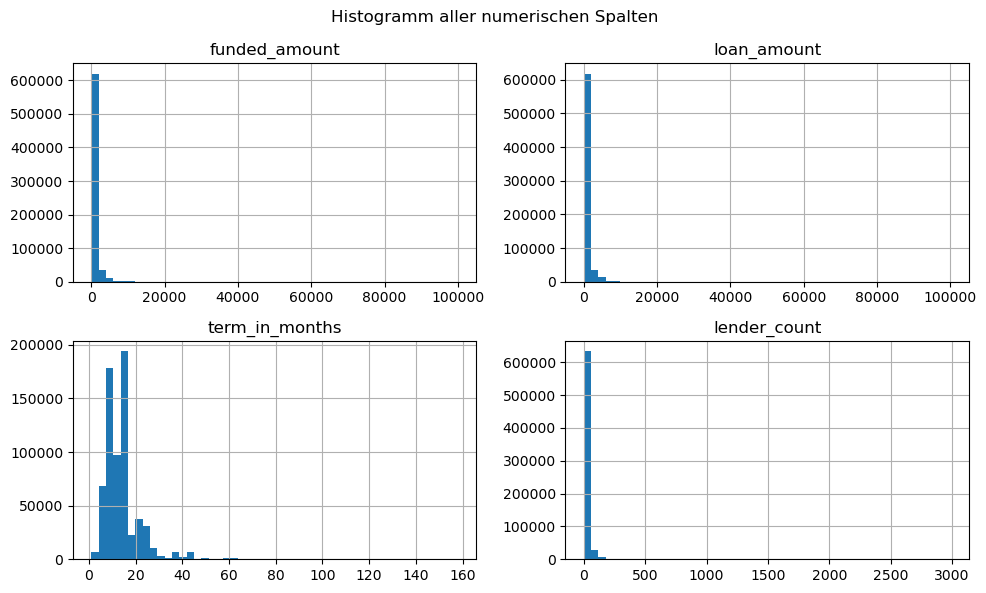

In [178]:
# Histogramm für die numerischen Spalten

df.hist(figsize=(10, 6), bins=50) # figsize ist optional und steuert die Größe des Diagramms
plt.suptitle('Histogramm aller numerischen Spalten')
plt.tight_layout() # Platzierung der Titel optimieren
plt.show()

In [179]:
# Zusammenhang der metrischen Spalten

df.corr()

,funded_amount,loan_amount,term_in_months,lender_count
funded_amount,1.000000,0.945044,0.149310,0.849168
loan_amount,0.945044,1.000000,0.184795,0.798697
term_in_months,0.149310,0.184795,1.000000,0.227283
lender_count,0.849168,0.798697,0.227283,1.000000


In [180]:
# Summe von Duplikaten

df.duplicated().sum()

24372

In [181]:
df.loc[df.duplicated(keep=False)==True,:]

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
327,275.0,275.0,Farming,Agriculture,to buy fertilizers and other farm supplies.,PH,Philippines,"Brookes Point, Palawan",PHP,8.0,8,female,irregular
392,100.0,100.0,Home Energy,Personal Use,to buy a solar lamp.,SV,El Salvador,NaN,USD,14.0,4,male,monthly
405,100.0,100.0,Home Energy,Personal Use,to buy a solar-powered lamp.,SV,El Salvador,NaN,USD,14.0,4,male,monthly
498,100.0,100.0,Home Energy,Personal Use,to buy a solar-powered lamp.,SV,El Salvador,NaN,USD,14.0,4,male,monthly
606,100.0,100.0,Home Energy,Personal Use,to buy a solar-powered lamp.,SV,El Salvador,NaN,USD,14.0,4,male,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,13.0,0,female,monthly
671201,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,13.0,1,female,monthly
671202,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,13.0,0,NaN,monthly
671203,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,13.0,0,female,monthly


Da es möglich sein kann, dass die selben Kreditnehmer erneut einen Kredit in der selben Höhe aufnehmen, bleiben die Duplikate erkalten. 

#### Systemseitig Fehlende Werte

In [182]:
# kurzer check auf systemseitig fehlende Werte

df.isnull().sum()

funded_amount             0
loan_amount               0
activity                  0
sector                    0
use                    4232
country_code              8
country                   0
region                56800
currency                  0
term_in_months            0
lender_count              0
borrower_genders       4221
repayment_interval        0
dtype: int64

In [183]:
# prozentualer Anteil fehlender Werte

round(df.isnull().sum()/len(df) * 100,2) 

funded_amount         0.00
loan_amount           0.00
activity              0.00
sector                0.00
use                   0.63
country_code          0.00
country               0.00
region                8.46
currency              0.00
term_in_months        0.00
lender_count          0.00
borrower_genders      0.63
repayment_interval    0.00
dtype: float64

*Spalte use*

In [184]:
# fehlende werte in Spalte 'use'

df.loc[:,'use'].unique()

# zu viele Informationen, um alles zu prüfen. Zudem ziemlich viele systemseitig fehlende Werte

array(['To buy seasonal, fresh fruits to sell. ',
       'to repair and maintain the auto rickshaw used in their business.',
       'To repair their old cycle-van and buy another one to rent out as a source of income',
       ...,
       'Pretend the issue with loan got addressed by Kiva Coordinator.',
       'Kiva Coordinator replaced loan use. Should see this in viewdiff.',
       'Edited loan use in english.'], dtype=object)

In [185]:
# Anzeige der fehlenden Werte

df.loc[df["use"].isnull()]

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
140,2975.0,2975.0,Food Production/Sales,Food,NaN,TZ,Tanzania,NaN,TZS,10.0,110,NaN,monthly
145,1200.0,1200.0,Personal Expenses,Personal Use,NaN,PE,Peru,NaN,PEN,20.0,44,NaN,monthly
170,4250.0,4250.0,Catering,Food,NaN,TZ,Tanzania,NaN,TZS,10.0,116,NaN,monthly
412,2350.0,2350.0,Beauty Salon,Services,NaN,TZ,Tanzania,NaN,TZS,10.0,75,NaN,monthly
414,725.0,725.0,Agriculture,Agriculture,NaN,SV,El Salvador,NaN,USD,20.0,19,NaN,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...
671151,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,NaN,KES,13.0,0,NaN,monthly
671174,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,13.0,0,NaN,monthly
671178,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,NaN,KES,13.0,0,NaN,monthly
671185,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,NaN,KES,13.0,0,NaN,monthly


In [186]:
# Prüfung eines möglichen Zusammenhangs/Abhängigkeit zu funded_amount

df.loc[(df["use"].isnull()) & (df["funded_amount"]==0)]

# kein Hinweis auf eine Abhängigkeit

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
36075,0.0,600.0,Personal Medical Expenses,Health,NaN,BO,Bolivia,NaN,USD,20.0,0,NaN,monthly
40489,0.0,1050.0,Cloth & Dressmaking Supplies,Retail,NaN,KE,Kenya,NaN,KES,14.0,0,NaN,monthly
53392,0.0,1025.0,Retail,Retail,NaN,NI,Nicaragua,NaN,USD,17.0,0,NaN,monthly
59399,0.0,325.0,Agriculture,Agriculture,NaN,SV,El Salvador,NaN,USD,13.0,0,NaN,bullet
61296,0.0,500.0,Farming,Agriculture,NaN,SV,El Salvador,NaN,USD,14.0,0,NaN,irregular
...,...,...,...,...,...,...,...,...,...,...,...,...,...
671151,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,NaN,KES,13.0,0,NaN,monthly
671174,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,13.0,0,NaN,monthly
671178,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,NaN,KES,13.0,0,NaN,monthly
671185,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,NaN,KES,13.0,0,NaN,monthly


In [187]:
# Löschen der Spalte use

df.drop(columns=['use'], inplace=True)

*Spalte country_code*

In [188]:
# fehlende werte in Spalte 'country_code'

df.loc[:,'country_code'].unique()

array(['PK', 'IN', 'KE', 'NI', 'SV', 'TZ', 'PH', 'PE', 'SN', 'KH', 'LR',
       'VN', 'IQ', 'HN', 'PS', 'MN', 'US', 'ML', 'CO', 'TJ', 'GT', 'EC',
       'BO', 'YE', 'GH', 'SL', 'HT', 'CL', 'JO', 'UG', 'BI', 'BF', 'TL',
       'ID', 'GE', 'UA', 'XK', 'AL', 'CD', 'CR', 'SO', 'ZW', 'CM', 'TR',
       'AZ', 'DO', 'BR', 'MX', 'KG', 'AM', 'PY', 'LB', 'WS', 'IL', 'RW',
       'ZM', 'NP', 'CG', 'MZ', 'ZA', 'TG', 'BJ', 'BZ', 'SR', 'TH', 'NG',
       'MR', 'VU', 'PA', 'VI', 'VC', 'LA', 'MW', 'MM', 'MD', 'SS', 'SB',
       'CN', 'EG', 'GU', 'AF', 'MG', nan, 'PR', 'LS', 'CI', 'BT'],
      dtype=object)

In [189]:
# country anzeigen lassen, wo Werte in Spalte country_code fehlen

d= df.loc[(df["country_code"].isnull()) & (df["country"])]
d

,funded_amount,loan_amount,activity,sector,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
202537,4150.0,4150.0,Wholesale,Wholesale,NaN,Namibia,EEnhana,NAD,6.0,162,female,bullet
202823,4150.0,4150.0,Wholesale,Wholesale,NaN,Namibia,Rundu,NAD,6.0,159,male,bullet
344929,3325.0,3325.0,Wholesale,Wholesale,NaN,Namibia,EEnhana,NAD,7.0,120,female,bullet
351177,3325.0,3325.0,Wholesale,Wholesale,NaN,Namibia,Rundu,NAD,7.0,126,male,bullet
420953,3325.0,3325.0,Wholesale,Wholesale,NaN,Namibia,EEnhana,NAD,7.0,118,female,bullet
421218,4000.0,4000.0,Wholesale,Wholesale,NaN,Namibia,Rundu,NAD,7.0,150,male,bullet
487207,5100.0,5100.0,Renewable Energy Products,Retail,NaN,Namibia,Katima Mulilo,NAD,7.0,183,male,bullet
487653,5000.0,5000.0,Wholesale,Wholesale,NaN,Namibia,Oshakati,NAD,7.0,183,female,bullet


In [190]:
# Fehlende Werte mit Ländercode für Nambia (NA) auffüllen

df['country_code'] = df['country_code'].fillna('NA')

In [191]:
# Prüfen, ob es geklappt hat 

df.loc[(df["country"]== 'Namibia')]

,funded_amount,loan_amount,activity,sector,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
202537,4150.0,4150.0,Wholesale,Wholesale,NA,Namibia,EEnhana,NAD,6.0,162,female,bullet
202823,4150.0,4150.0,Wholesale,Wholesale,NA,Namibia,Rundu,NAD,6.0,159,male,bullet
344929,3325.0,3325.0,Wholesale,Wholesale,NA,Namibia,EEnhana,NAD,7.0,120,female,bullet
351177,3325.0,3325.0,Wholesale,Wholesale,NA,Namibia,Rundu,NAD,7.0,126,male,bullet
420953,3325.0,3325.0,Wholesale,Wholesale,NA,Namibia,EEnhana,NAD,7.0,118,female,bullet
421218,4000.0,4000.0,Wholesale,Wholesale,NA,Namibia,Rundu,NAD,7.0,150,male,bullet
487207,5100.0,5100.0,Renewable Energy Products,Retail,NA,Namibia,Katima Mulilo,NAD,7.0,183,male,bullet
487653,5000.0,5000.0,Wholesale,Wholesale,NA,Namibia,Oshakati,NAD,7.0,183,female,bullet


*Spalte region*

In [192]:
# fehlende werte in Spalte 'region'

df.loc[:,'region'].unique()

array(['Lahore', 'Maynaguri', 'Abdul Hakeem', ..., 'Gbenikoro Village',
       'Morimaraia', 'alejandria'], dtype=object)

In der Spalte region liegen 8,46 Prozent fehlende Werte vor. Nun ist zu überlegen, wie damit umgegangen wird. Eine Möglichkeit wäre es, die fehlenden Werte durch die häufigsten in dem jeweiligen Land (Spalte country) vorkommenden Regionen aufzufüllen. Da dies aber unter Umständen zu einen falschen Rückschlüssen in den inputierten Regionen führen könnte, wird dieser Gedanke nicht weiter verfolgt. Andernfalls bleibt bei den nominalskalierten Daten nur die Löschung. Da in die Daten nichts hinein interpretiert werden soll, was unter Umständen nicht vorhanden ist, wurde die Spalte region gelöscht und es soll für die weitere Analyse die Spalte country verwendet werden, um entsprechende Aussagen zu den Krediten im geographischen Vergleich zu treffen.

In [193]:
# Spalte region löschen

df.drop(columns=['region'], inplace=True)

*Spalte borrorer_genders*

In [194]:
# fehlende Werte in Spalte 'borrower_genders'

df.loc[:,'borrower_genders'].unique()

array(['female', 'female, female', 'female, female, female', ...,
       'female, female, male, female, female, female, female, female, female, female, male, male, female, female, male, female, female, female, female, female, female, female',
       'male, female, female, female, female, female, female, female, male, male, female, male, female, male, male, male',
       'female, female, female, male, female, female, female, male, female, female, female, male, female, male, female, female, female, female, female, female, female, female, female, female, female, female, female, female, male'],
      dtype=object)

Die Spalte borrower_genders enthält eine wichtige Information über die Darlehnsnehmer und gibt dem Unternehmen Informationen über seine Kunden. Auch kann über diese Spalte beispielsweise festgestellt werden, ob ein bestimmtes Geschlecht, hier vermutlich der Mann, (bisher) eher kein Adressat dieser Plattform ist und es könnten Überlegungen getroffen werden, ob dies eine neue "Marktlücke" darstellt, welche ausgebaut werden sollte oder ob dieses Angebot eher den Frauen, welche es tendenziell etwas schwieriger haben, zugute kommen soll. In der Spalte borrower_genders liegen 0,6 Prozent fehlende Werte vor. Eine Imputation anhand von Gruppen, welche sectorspezifisch zusammenkommen, wäre denkbar, aber aufgrund der vielen Ausprägungen in borrower_genders, aber auch in sector, nicht zeiteffizient. Es wird im folgenden geprüft, ob es eine Abhängigkeit zwischen Einträgen in borrower_genders zu den Auszahlungen (funded_amount) gibt. Dies scheint, vergleichbar wie bei use, nicht der Fall zu sein. Ein weiteres Vorgehen könnte nun sein, die Zeilen mit den fehlenden Werten komplett rauszunehmen. Da wir mit fehlenden Werten keine sinnvollen Aussagen und Interpretationen tätigen können, macht es auch wenig Sinn, diese in Form von 'unknown' oder ähnlichen weiter zu führen. Zudem wurde festgestellt, dass eine fehlende Eintragung in dieser Spalte keinen wesentlichen Einfluss auf das Geschäftsmodell hat. Entsprechend werden die Zeilen mit den fehlenden Werten in borrower_genders für die weiteren Analysen nicht berücksichtigt. An dieser Stelle ist darauf hinzuweisen, dass, abgesehen von den für die Analyse nicht-berücksichtigten Spalten, nicht mehr mit 100 Prozent der Daten gerechnet wird, sondern weiter mit 99,4 Prozent.

In [195]:
# Prüfung, wieviele Konstellationen an Geschlechtszusammensetzugen es gibt 

df.loc[:,'borrower_genders'].nunique()

11298

In [196]:
# Prüfung eines möglichen Zusammenhangs/Abhängigkeit zu funded_amount

df.loc[(df["borrower_genders"].isnull()) & (df["funded_amount"]==0)]

# kein Hinweis auf eine Abhängigkeit, ähnliches Ergebnis wie bei use.
# Ob in borrower_genders oder use Einträge vorliegen, hat offensichtlich keinen wesentlichen Einfluss auf Auszahlungen

,funded_amount,loan_amount,activity,sector,country_code,country,currency,term_in_months,lender_count,borrower_genders,repayment_interval
36075,0.0,600.0,Personal Medical Expenses,Health,BO,Bolivia,USD,20.0,0,NaN,monthly
40489,0.0,1050.0,Cloth & Dressmaking Supplies,Retail,KE,Kenya,KES,14.0,0,NaN,monthly
53392,0.0,1025.0,Retail,Retail,NI,Nicaragua,USD,17.0,0,NaN,monthly
59399,0.0,325.0,Agriculture,Agriculture,SV,El Salvador,USD,13.0,0,NaN,bullet
61296,0.0,500.0,Farming,Agriculture,SV,El Salvador,USD,14.0,0,NaN,irregular
...,...,...,...,...,...,...,...,...,...,...,...
671151,0.0,25.0,Livestock,Agriculture,KE,Kenya,KES,13.0,0,NaN,monthly
671174,0.0,25.0,Games,Entertainment,KE,Kenya,KES,13.0,0,NaN,monthly
671178,0.0,25.0,Livestock,Agriculture,KE,Kenya,KES,13.0,0,NaN,monthly
671185,0.0,25.0,Livestock,Agriculture,KE,Kenya,KES,13.0,0,NaN,monthly


In [197]:
# löschen von Spalten mit fehlenden Werten

df = df.dropna(subset=['borrower_genders'])

In [198]:
# prüfen, ob es geklappt hat

df.loc[df["borrower_genders"].isnull()]

,funded_amount,loan_amount,activity,sector,country_code,country,currency,term_in_months,lender_count,borrower_genders,repayment_interval


In [199]:
# Funktion, die Geschlechterzusammensetzungen je Projekt in Listen schreibt, um anschließend in neue Spalte im dataframe zu geben

def sex(borrower_genders):
    gender_list = borrower_genders.split(",")
    gender_list = list(set(gender_list))
    gender_list = [borrower_genders.strip() for borrower_genders in gender_list]
    if len(gender_list)==2:
        if 'female' in gender_list and 'male' in gender_list:
            return 'mixed_group'
        elif 'female' in gender_list:
            return 'female_group'
        elif 'male' in gender_list:
            return 'male_group'
    elif gender_list[0]=='female':
        return 'female_single'
    elif gender_list[0]=='male':
        return 'male_single'

In [200]:
# Befüllen der neuen Spalte gender

df = df.copy()

df['gender'] = df['borrower_genders'].apply(sex)

In [201]:
# Anzeige der Werte in der neuen Spalte gender

df['gender'].unique()

array(['female_single', 'female_group', 'male_single', 'male_group',
       'mixed_group'], dtype=object)

Um Kapazitäten zu sparen, werden hier alle weiteren Spalten (nachträglich) gelöcht, welche für die Analyse nicht herangezogen werden.

In [202]:
# Löschen der Spalten, die nicht benötigt werden

df.drop(columns=['activity', 'currency', 'term_in_months', 'repayment_interval'], inplace=True)

In [203]:
df

,funded_amount,loan_amount,sector,country_code,country,lender_count,borrower_genders,gender
0,300.0,300.0,Food,PK,Pakistan,12,female,female_single
1,575.0,575.0,Transportation,PK,Pakistan,14,"female, female",female_group
2,150.0,150.0,Transportation,IN,India,6,female,female_single
3,200.0,200.0,Arts,PK,Pakistan,8,female,female_single
4,400.0,400.0,Food,PK,Pakistan,16,female,female_single
...,...,...,...,...,...,...,...,...
671199,0.0,25.0,Agriculture,PY,Paraguay,0,female,female_single
671200,0.0,25.0,Agriculture,PY,Paraguay,0,female,female_single
671201,25.0,25.0,Agriculture,KE,Kenya,1,female,female_single
671203,0.0,25.0,Agriculture,KE,Kenya,0,female,female_single


#### Ausreißer und Extremwrte

Ausreißer / Extremwerte

Ziel der Analyse ist es herauszufinden, in welchen technischen Eigenschaften unser Unternehmen unseren Wettbewerbern voraus ist oder hinterher hinkt. Somit stellen Ausreißer keine Ausreißer im statistischen Sinne dar, sondern sind als Extremwerte einzustufen und somit beizubehalten.

In vorliegenden Datensatz fällt auf, dass es bei funded_amount und loan_amount zu hohen max-Werten kommt. Diese wurden auf fehlende Werte hin überprüft,- es handlet sich um tatsächlich vorkommende Werte. Offensichtlich gab es also einige höhere Mikrokredite. Die hohen Werte korrelieren sowohl untereinander als auch mit der Skala lender_count, sodass diese Werte in einem realistischen Verhältnis und Zusammenhang steigen,- wenn der Auszahlungsbetrag höher ist, dann auch der beantragte Geldbetrag und die Anzahl der Leihenden.

Weiter fällt, wie oben bereits erwähnt, auf, das bei funded_amount und lender_count min-Werte von 0 vorliegen. Offensichtlich gibt es Projekte, für die keine Investoren gefunden wurde und für die keine Auszahlung zustande kam. Dies Daten sollten weiter betrachtet weren.

In [204]:
df.describe()

,funded_amount,loan_amount,lender_count
count,666984.000000,666984.000000,666984.000000
mean,785.127844,840.300742,20.550875
std,1127.999928,1187.909500,28.366197
min,0.000000,25.000000,0.000000
25%,250.000000,275.000000,7.000000
50%,450.000000,500.000000,13.000000
75%,900.000000,1000.000000,24.000000
max,100000.000000,100000.000000,2986.000000


In [205]:
df.corr()

,funded_amount,loan_amount,lender_count
funded_amount,1.000000,0.951877,0.848174
loan_amount,0.951877,1.000000,0.803402
lender_count,0.848174,0.803402,1.000000


**Informationsextraktion**

KPI's
Kennzahlen dienen der Dimensionsreduktion und sind beispielsweise aus Korrelationen ersichtlich.

Hier sind einige mögliche recherchierte Kennzahlen, die für die Bewertung der Leistung und des Erfolgs von Kiva verwendet werden könnten:

Gesamtanzahl der vergebenen Kredite: Diese Kennzahl gibt Auskunft über die Anzahl der Kredite, die von Kiva an Unternehmer in Entwicklungsländern vergeben wurden.

Gesamtbetrag der vergebenen Kredite: Diese Kennzahl zeigt den Gesamtbetrag der finanzierten Kredite an und gibt einen Überblick über das Ausmaß der finanziellen Unterstützung, die Kiva bereitgestellt hat.

Rückzahlungsrate: Die Rückzahlungsrate gibt an, wie viele Kreditnehmer ihre Kredite gemäß den vereinbarten Bedingungen zurückgezahlt haben. Eine hohe Rückzahlungsrate zeigt die Fähigkeit der Kreditnehmer, ihre finanziellen Verpflichtungen zu erfüllen.

Durchschnittliche Kreditgröße: Diese Kennzahl gibt an, wie viel Geld im Durchschnitt pro Kredit vergeben wurde. Sie kann helfen, die Größenordnung der Kredite zu verstehen und den finanziellen Einfluss auf die Kreditnehmer zu beurteilen.

Anzahl der unterstützten Unternehmer: Diese Kennzahl zeigt die Anzahl der Unternehmer, die durch Kiva-Kredite Unterstützung erhalten haben. Sie gibt einen Einblick in die Reichweite und den Umfang der Unterstützung.

Geografische Verteilung: Die geografische Verteilung gibt an, in welchen Ländern oder Regionen die Kredite von Kiva vergeben wurden. Sie kann aufzeigen, wo Kiva einen Einfluss hat und wo die Nachfrage nach Unterstützung am höchsten ist.

Soziale Auswirkungen: Diese Kennzahl kann qualitativ gemessen werden und bezieht sich auf die positiven Auswirkungen, die Kiva-Kredite auf das Leben der Kreditnehmer haben. Dies könnte beispielsweise die Schaffung von Arbeitsplätzen, die Verbesserung des Bildungsniveaus oder die Stärkung von Gemeinschaften umfassen.

Es ist wichtig zu beachten, dass die tatsächlichen Kennzahlen von Kiva von Jahr zu Jahr variieren können und dass Kiva selbst regelmäßig über die Leistung und die erzielten Auswirkungen berichtet.

Kiva selber berichtet auf seiner Plattform über eine hohe Rückzahlungsquote von 96 Prozent, welche weiterhin als wichtige Kennnzahl dient, da so die Investoren eine relativ hohe Sicherheit haben, neben der Tatsache, etwas Gutes zu tun, ihr Geld nicht zu verlieren (es ist schließlich keine Crowd-funding, sondern eine Crowd-investing Plattform).

Da aber Eingangs in der Datenbereinigung Auffälligkeiten bei den min- (und max-) Werten bei funded_amount und auch lender_count auffielen, soll die weitere Analyse sich auf diesen Berech konnzentrieren und eine entsprechende Kennzahl für die Analyse entwickelt werden.

Für diese Auswertung wurde in Bezug auf enge Zusammenhänge und Korrelationen zwischen den Spalten überlegt, welche Kennzahlen für das Unternehmen noch wichtig sein könnten. Der Zusammenhang zwischen funded_amount und lender_count besteht insofern, dass an größeren Krediten auch mehr Investoren beteiligt sind. Kredite, die nicht ausgezahlt wurden zeichnen sich dadurch aus, dass schlichtweg keine Investoren gefunden wurden. Da es für das Unternehmen erstrebenswert ist, dass alle Projekte einen Investor finden, soll sich die weitere Auswertung in Folge darauf konzentrieren, wo diese nicht - Auszahlungen entstehen beziehungsweise wo, auch wenn Investoren gefunden wurden, nicht der volle Betrag erzielt wurde, sondern nur ein Teilbetrag ausgezahlt wurde. Da eingangs bereits aufgefallen ist, dass es eine hohe Korrelation zwischen funded_amount und loan_amount gibt, wurden diese weiter betrachtet. funded_amount, also der tastsächliche Auszahlungsbetrag sollte idealerweise deckungsgleich mit loan_amount, also dem beantragten Betrag sein. Setzt man diese beiden Spalten ins Verhältnis, indem man funded_amount durch loan_amount dividiert, sollte idealerweise 1 das Ergebnis sein, wenn die volle beantragte Kreditsumme erreicht und ausgezahlt wurde. Unterschreitet diese Kennzahl jedoch die 1, wurde nur ein Teilkredit oder gar kar kein Kredit ausgezahlt. Erstrebenswert sind entsprechend möglichst hohe dieser Kennzahlen, die im folgenden entwickelt wird. Unterschreitungen hingegen deuten auf Handlungspotenzial seitens der Plattform hin.

#Darstellung der Korrelation zwischen funded_amount und loan_amount mittels Scatterplot

scatter = px.scatter(data_frame=df,
                          x="funded_amount",
                          y="loan_amount",
                          title="Auzahlungsbetrag und Höhe des beantragten Kredits in Dollar ",
                          labels={"funded_amount":"Auszahlung", "loan_amount":"Beantragung"},
                         )

scatter.show()

In [206]:
# Berechnung der KPI funded_amount / loan_amount

df.loc[:,'KPI_funded_loan'] = round((df['funded_amount']/df['loan_amount']))
df.head() 

# neue Spalte KPI_funded_loan im Datensatz

,funded_amount,loan_amount,sector,country_code,country,lender_count,borrower_genders,gender,KPI_funded_loan
0,300.0,300.0,Food,PK,Pakistan,12,female,female_single,1.0
1,575.0,575.0,Transportation,PK,Pakistan,14,"female, female",female_group,1.0
2,150.0,150.0,Transportation,IN,India,6,female,female_single,1.0
3,200.0,200.0,Arts,PK,Pakistan,8,female,female_single,1.0
4,400.0,400.0,Food,PK,Pakistan,16,female,female_single,1.0


Für eventuelle weitere Berechnungen wie beispielsweise Machine Learning Algorithmen wird der aufbereitete Datensatz neu abgespeichert. 

In [207]:
# Abspeichern als CSV
df.to_csv('df_after_preprocessing.csv',sep=',')

# Abspeichern als Pickle
df.to_pickle('df_after_preprocessing.pkl')

### CRISP-DM: EDA

Zie der Analyse ist es, wichtige Informationen für das Unternehmen zu generieren, die einen Mehrwert schaffen. Dafür ist es wichtig, die Unternehmensziele als Grundlage zu verwenden: Das Unternehmen möchte keinen Profit machen, sondern Chancengleichheit für benachteiligte Menschen schaffen. Weiter würde das Unternehmen gerne expandieren, um diese Möglichkeit zu vergrößern.


Die Datenselektion und Aggregation sind ein wichtiger Teil in der Datenanalyse. Die Datenselektion ermöglicht es, spezifische Daten aus dem DataFrame auszuwählen, basierend auf bestimmten Kriterien oder Bedingungen. So kann gezielt auf relevante Daten zugegriffen werden, um sie zu analysieren oder zu bearbeiten. Die Datenaggregation erlaubt es, Daten zusammenzufassen oder zu gruppieren, um nützliche Informationen zu extrahieren. Durch Aggregation können Trends und Muster in den Daten identifiziert werden, was bei der Entscheidungsfindung und Analyse von Daten hilfreich ist. Die Datenselektion und Aggregation erfolgt im nächsten Kapitel direkt vor der Auswahl der dazugehörigen Plots und soll hier nicht isoliert von den Plots dargestellt werden.

#### Datenselektion, Aggregation und Plots

**Betrachtung nach Ländern**

In [208]:
# Gruppierung Staaten und Summen der Auszahlung

df_country = df.groupby(['country', 'country_code'], as_index = False).agg(func={"funded_amount":"sum"})

df_country.sort_values(by=['funded_amount'], ascending=False, inplace=True)


df_country

,country,country_code,funded_amount
59,Philippines,PH,54438075.0
34,Kenya,KE,31970715.0
58,Peru,PE,30302100.0
57,Paraguay,PY,29297650.0
22,El Salvador,SV,23060625.0
...,...,...,...
0,Afghanistan,AF,14000.0
6,Bhutan,BT,10000.0
81,Vanuatu,VU,9250.0
25,Guam,GU,395.0


Zunächst wird für den Überblick eine Karte mit den Ländern geplottet welche darstellt, welche Kreditbeträge in Summe erzielt werden. Auffallend ist hier, dass insbesondere die Phillipinen hohe Summen erzielen. Hier ist auch der Hauptsitz des Unternehmens. Mittlere Summen werden in den USA erziehlt, mittel- bis mittelhohe Summen in Kenya und im westlichen Teil Südafrikas, die übrigen Länder befinden sich im niederigeren Bereich.

In [209]:
# Geographische Verteilung der Kreditnehmer mit Summe der ausgezahlten Kredite

fig = px.choropleth(df_country,
                    locations='country',
                    locationmode='country names', 
                    color='funded_amount',
                    labels={ 'funded_amount': 'Auszahlungen (Dollar)'},
                    hover_name='country',
                    title='Kredithöhe in Dollar aufsummiert nach Ländern',
                    color_continuous_scale='Plasma')

fig.show()

Der hohe Wert in den Phillipinen entsteht über die Masse an Krediten. Hier ist der Hauptsitz und um den Hauptsitz herum sind die meisten Kredite entstanden.

In [210]:
# Anzahl der Kredite je Staat

df_country_c = df.groupby(['country', 'country_code'], as_index = False).agg(func={"funded_amount":"count"})

df_country_c.sort_values(by=['funded_amount'], ascending=False, inplace=True)


df_country_c

# Hoher Wert bei Phillipinen über sehr hohen Count begründet

,country,country_code,funded_amount
59,Philippines,PH,160361
34,Kenya,KE,75113
22,El Salvador,SV,39321
11,Cambodia,KH,34811
54,Pakistan,PK,26853
...,...,...,...
0,Afghanistan,AF,2
6,Bhutan,BT,1
18,Cote D'Ivoire,CI,1
25,Guam,GU,1


Als nächstes sollen die Kredithöhen im Durchschnitt betrachtet werden.

In [211]:
# Gruppierung Staaten und Mittelwert 

df_country_m = df.groupby(['country', 'country_code'], as_index = False).agg(func={"funded_amount":"mean"})

df_country_m.sort_values(by=['funded_amount'], ascending=False, inplace=True)


df_country_m

,country,country_code,funded_amount
18,Cote D'Ivoire,CI,50000.000000
44,Mauritania,MR,15000.000000
6,Bhutan,BT,10000.000000
13,Chile,CL,8080.555556
0,Afghanistan,AF,7000.000000
...,...,...,...
41,Madagascar,MG,320.357517
40,Liberia,LR,317.041667
76,Togo,TG,257.096830
53,Nigeria,NG,188.042942


In [212]:
fig = px.choropleth(df_country_m,
                    locations='country',
                    locationmode='country names',  
                    color='funded_amount',
                    hover_name='country',
                    labels={ 'funded_amount': 'Auszahlungen (Dollar)'},
                    title='Kredithöhe in Dollar (Auszahlung) im Mittel nach Ländern',
                    color_continuous_scale='Plasma')

fig.show()

Bei der Betrachtung der Mittelwerte hingegen ergibt sich ein anderes Bild. Hier sind die Werte über alle Länder hinweg eher niedrig, lediglich Cote D'lvoire (Elfenbeinküste in Afrika) fällt mit hohen Werten auf.

Bei genauerer Betrachtung des hohen Wertes in Cote D'lvoire fällt auf, dass es sich um einen einzelnen Kredit handelt, der sehr hoch ist. Entsprechend wurde der Mittelwert auch nur uber diesen einzigen Wert ausgegeben, der folglicgh nicht als repräsentativ betrachtet werden kann.

In [213]:
# Anzahl der Kredite je Staat

df_country_c = df.groupby(['country', 'country_code'], as_index = False).agg(func={"funded_amount":"count"})

df_country_c.sort_values(by=['funded_amount'], ascending=True, inplace=True)


df_country_c

# nur ein Weert bei Cote D'lvoire

,country,country_code,funded_amount
44,Mauritania,MR,1
6,Bhutan,BT,1
25,Guam,GU,1
18,Cote D'Ivoire,CI,1
0,Afghanistan,AF,2
...,...,...,...
54,Pakistan,PK,26853
11,Cambodia,KH,34811
22,El Salvador,SV,39321
34,Kenya,KE,75113


Nun soll die neu ermittelte Kennzahl (KPI) angeschaut werden:

In [214]:
# Gruppierung der Länder, Kennzal 

df_country_KPI = df.groupby(['country', 'country_code'], as_index = False).agg(func={"KPI_funded_loan":"mean"})

df_country_KPI.sort_values(by=['KPI_funded_loan'], ascending=False, inplace=True)


df_country_KPI

,country,country_code,KPI_funded_loan
0,Afghanistan,AF,1.000000
67,Somalia,SO,1.000000
39,Lesotho,LS,1.000000
44,Mauritania,MR,1.000000
50,Namibia,NA,1.000000
...,...,...,...
2,Armenia,AM,0.878999
60,Puerto Rico,PR,0.791045
80,United States,US,0.691387
83,Virgin Islands,VI,0.000000


In [215]:
# Plot mit Kennzahl 

fig = px.choropleth(df_country_KPI,
                    locations='country',
                    locationmode='country names',  
                    color='KPI_funded_loan',
                    hover_name='country',
                    labels={ 'KPI_funded_loan': 'KPI-Wert'},
                    title='**KPI (funded_amoubt/loan_amount) nach Ländern**',
                    color_continuous_scale='Plasma')

fig.show()

Der Plot zeigt, dass die gewünschten Auszahlungen auffallend in den USA nicht in voller Höhe zustande kommen.

**Wie verteilt sich die KPI in Betug auf die unterschiedlichen Sektoren?**

In [216]:
df_sector = df.groupby(['sector'], as_index = False).agg(func={"KPI_funded_loan":"mean"})

df_sector.sort_values(by=['KPI_funded_loan'], ascending=False, inplace=True)

df_sector

,sector,KPI_funded_loan
9,Manufacturing,0.994966
14,Wholesale,0.987220
1,Arts,0.986076
4,Education,0.985634
10,Personal Use,0.978978
3,Construction,0.971263
6,Food,0.968309
7,Health,0.958570
0,Agriculture,0.957679
11,Retail,0.956253


In [217]:
fig = px.bar(data_frame=df_sector,
     x='KPI_funded_loan',
     y="sector",
    color='sector',
    orientation='h',
    labels={
        'KPI_funded_loan': 'Auszahlungen',
        'sector': 'Branche'
    },
    title='Verhältnis Projekte zu Auszahlungen (=KPI) je Branche'
)


fig.show()

**Wie verteilt sich die KPI auf das Geschlecht?**

In [218]:
df_gender = df.groupby(['gender'], as_index = False).agg(func={"KPI_funded_loan":"mean"})

df_gender.sort_values(by=['KPI_funded_loan'], ascending=False, inplace=True)

df_gender

,gender,KPI_funded_loan
0,female_group,0.976274
1,female_single,0.972644
4,mixed_group,0.970943
2,male_group,0.917650
3,male_single,0.917260


In [219]:
bar = px.bar(data_frame=df_gender, 
                    x='KPI_funded_loan',
                    y="gender",
                    color='gender',
                    labels={"KPI_funded_loan":"KPI", "gender":"Geschlecht"},
                    title="Verhältnis Projekte zu Auszahlungen (KPI) nach Geschlecht",
                    template="simple_white"
                                     
                   )

bar.show()

Männer und Männergruppen erreichen offensichtlich nicht immer den gewünschten Auszahlungsbetrag, während das bei Frauen, Frauengruppen aber auch gemischten Gruppen nicht der Fall ist.

**Wie sieht allgemein die Verteilung aus zwischen den Geschlechtern und den Sektoren?**

Zunächst erfolgt für den Überblick ein Plot der Rohdaten, um ein Gefühl für die Häufigkeiten zu entwickeln. Die Geschlechter female_single, male_single und female_group nehmen mit ihren Projekten (in Dollar) je etwa ein drittel aller Projekte ein, der Anteil an Männergruppen (male_group) und gemischten Gruppen (mixed_group) ist hingegen verschwindend gering. Die Sektoren Agriculture, Food und Retail nehmen den größten Platz ein. An der Farbgebung ist zu erkennen, dass es sich im einzelnen eher um kleinere Auszahlungen handelt.

In [220]:
# Anzeige der Verteilung des Geschlechts und der Sektoren in Hinblick auf die Projekte

fig = px.sunburst(df, path=['gender', 'sector'],values='loan_amount',
                                                title= 'Verteilung Geschlechter und Sektoren', 
                                                labels= {'funded_amount': 'Auszahlungshöhe (Dollar)'},
                                                color='funded_amount') 
fig.show()

Betrachtet man hingegen die aggregierten Werte (Mittelwerte) , so ergibt sich ein vollkommen anderes Bild. Bezogen auf die vorgestellten Projekte nehmen alle Gschlechtergruppen durchschnittlich etwa ein fünftel ein. Offensichtlich erreichen die Projekte der Männergruppen und der gemischten Gruppen durchschnittlich deutlich höhere Geldbeträge, sodass sie in diesem Plot mit den Singls und Frauengruppen etwa gleich auf sind. Die Verteilung auf die verschiedenen Branchen ist deutlich ausgeglichener. Das Bild zeigt aber auch deutliche Unterschiede zum vorherigen Plot in den Höhen der ausgezahlten Krediten: Während hier die Singles, insbesondere die Frauen, durchschnittlich eher geringe Kredite ausgezahlt bekommen, sind bei allen Gruppen die Auszahlungen deutlich höher. Diser Zusammenhang scheint auch plausibel, da sich in Gruppen die Verantwortung auf mehrere Personen verteilt und entsprechend größere Projekte mit größeren Summen gestemmt werden können.

In [221]:
df_gender_sector = df.groupby(['gender', 'sector'], as_index = False).agg(func={"funded_amount":"mean", 
                                                                      'loan_amount': 'mean'})

df_gender_sector.sort_values(by=['funded_amount'], ascending=False, inplace=True)

df_gender_sector

,gender,sector,funded_amount,loan_amount
65,mixed_group,Entertainment,2650.000000,2650.000000
74,mixed_group,Wholesale,2550.000000,2550.000000
12,female_group,Services,2469.978632,2505.859632
33,male_group,Construction,2468.055556,2879.861111
7,female_group,Health,2460.126582,2464.082278
...,...,...,...,...
55,male_single,Personal Use,488.737818,532.125642
25,female_single,Personal Use,473.951114,494.207840
40,male_group,Personal Use,323.518519,324.259259
10,female_group,Personal Use,241.430302,247.287272


In [222]:
# Anzeige aller Projekte in den USA von Männern oder Männergruppen
fig = px.sunburst(df_gender_sector, path=['gender', 'sector'], values='loan_amount',
                  color='funded_amount', title= '**Verteilung Geschlechter und Sektoren**',
                 labels= {'funded_amount': 'Auszahlungshöhe (Dollar)'})  
fig.show()

Fazit:

Die reine Menge (Rohdaten) an Projekten ist bei Singles und Frauengruppen deutlich höher als bei Männergruppen und gemischten Gruppen, jedoch scheint es sich bei erstgenannten generell um kleinere Summenbeträge zu handeln. Das wird ersichtlich, wenn man den zweiten Plot mit den Mittelwerten betrachtet. Männergruppen und gemischte Gruppen nehmen von der Kredithöhe für ihre Projekte durchschnittlich deutlich höhere Beträge ein als es ihr Anschein in den Rohdaten vermuten lässt,- auch die Männer-Singles zeichnen sich durch teurere Projekte aus.

Nun ist es wichtig zu wissen, was die Buisness-Ziele des Unternehmens sind: Das Unternehmen ist nicht auf Profit aus, sondern kämpft für Gleichberechtigung und möchte Menschen, hauptsächlich in Entwicklungsländern, unterstützen, ihre Lebenssituation zu verbessern, um mehr Chancengleichheit in der Welt zu erzielen. Es wird also weniger darum gehen, möglichst hohe Geldbeträge in den Projekten zu erzielen sondern vielmehr darum, möglichst vielen Menschen zu helfen. Sicherlich ist in größeren und teureren Projekten, an denen mehr Menschen beteiligt sind, gleichzeitig auch mehr Menschen geholfen, sodasss größere Projekte auch ein indirektes Ziel des Unternehmens sein können. Auffällig in den Daten war bezüglich der KPI jedoch, dass es bei einigen Projekten, insbesondere von Männern und Männergruppen, nicht immer oder nur anteilig zu Auszahlungen gekommen ist. Dies könnte, wie eben festgestellt, damit zu tun haben, dass Männer und Männergruppen oder Gruppen, indenen Männer mit beteiligt sind, durchschnittlich mehr Geld innerhalb ihrer Projekte beantragen. Zusatzlich viel zu Beginn auf, dass diese nicht vollständig finanzierten Projekte vor allem in den USA auftreten. Im Folgenden soll daher der Fokus auf Projekten von Männern in den USA liegen, um die Situaton genauer zu betrachten.

Folgender Plot soll zunächst noch einmal die Größe (in Dollar) aller beantragten Projekte illustrieren. Offensichtlich beantragen insbesondere Männer in den USA die höchsten Summen. Da Die USA kein Entwicklungsland ist, sind allerdings dort die Lebenshaltungskosten höher, sodass dies in Relation dazu zu sehen ist.

In [223]:
# Anzeige aller Projekte ohne Auszahlungen

df_0=df.loc[(df["funded_amount"]==0)]
df_0

,funded_amount,loan_amount,sector,country_code,country,lender_count,borrower_genders,gender,KPI_funded_loan
4814,0.0,5000.0,Food,US,United States,0,female,female_single,0.0
6784,0.0,10000.0,Retail,US,United States,0,male,male_single,0.0
10735,0.0,5000.0,Services,US,United States,0,male,male_single,0.0
12037,0.0,5000.0,Food,US,United States,0,male,male_single,0.0
13542,0.0,1500.0,Arts,US,United States,0,male,male_single,0.0
...,...,...,...,...,...,...,...,...,...
671198,0.0,75.0,Agriculture,MX,Mexico,0,female,female_single,0.0
671199,0.0,25.0,Agriculture,PY,Paraguay,0,female,female_single,0.0
671200,0.0,25.0,Agriculture,PY,Paraguay,0,female,female_single,0.0
671203,0.0,25.0,Agriculture,KE,Kenya,0,female,female_single,0.0


In [224]:
# Treemap für alle Projekte 

fig = px.treemap(df_0, path=[px.Constant("Kein Kredit"), 'country', 'gender', 'sector'], values='loan_amount', 
                 title= 'Übersicht beantragte Kredithöhe (Dollar)')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

**Im Folgenden soll der Blick ausschließlich auf die USA gerichtet werden:**

In [225]:
# Anzeige aller Projekte in den USA von Männern oder Männergruppen

df_USA = df.loc[(df['country'] == 'United States') & ((df['gender'] == 'male_single') | (df['gender'] == 'male_group'))]
df_USA

,funded_amount,loan_amount,sector,country_code,country,lender_count,borrower_genders,gender,KPI_funded_loan
455,5000.0,5000.0,Agriculture,US,United States,158,male,male_single,1.0
504,5000.0,5000.0,Services,US,United States,273,male,male_single,1.0
2436,4075.0,10000.0,Services,US,United States,106,male,male_single,0.0
2514,50.0,2500.0,Arts,US,United States,2,male,male_single,0.0
2902,5000.0,5000.0,Arts,US,United States,185,male,male_single,1.0
...,...,...,...,...,...,...,...,...,...
668156,750.0,2000.0,Services,US,United States,16,male,male_single,0.0
668891,650.0,10000.0,Food,US,United States,20,male,male_single,0.0
669457,525.0,10000.0,Food,US,United States,11,male,male_single,0.0
670323,50.0,7000.0,Manufacturing,US,United States,2,male,male_single,0.0


Folgender Plot verdeutlicht nochmal die unterschiedliche Verteilung innerhalb aller Männer in den USA (Rohdaten!) bezogen auf den beantragten und ausgezahlten Kreditbetrag. Während über alle Daten und Länder hinweg ein klarer, linearer Zusammenhang zwischen den beiden metrischen Werten liegen, weichen hier die Werte stark und unkoordiniert ab. Die Anzahl der beteiligten Investoren ist in der Bubble-Größe mit wiedergegeben. Interessant ist, dass der Bereich Servives ausschließlich durch die Gruppe bedient wird und nicht durch Singles, während alle anderenen Bereiche nur von Singles bedient werden.

In [226]:
# Darstellung von beantragtem und ausgezahltem Kredit (Rohdaten) bei Männern in den USA

fig = px.scatter(df_USA, x="loan_amount", y="funded_amount", size="lender_count", color="sector",
                 hover_name="sector", log_x=True, size_max=60,
                 symbol="gender", symbol_map={"male_single": "circle", "male_group": "cross"},
                 title= '**Verhältnis ausgezahle Kredite (Dollar) und beantragte Kredite in den USA bei Männern**',
                labels={"loan_amount":"beantragte Kredithöhe (Dollar)", 
                        "funded_amount":"ausgezahlt (Dollar)",
                        "sector":"Sektor",
                        "gender": "Geschlecht"})
fig.show()

Nun sollen die nach Mittelwert aggregierten Daten zu den Männern in den USA betrachtet werden: Hier zeigt sich erneut ein ganz anderes Bild als in den Rohdaten. Der Zusammenhang zwischen den beantragten und ausgezahlten Kredithöhen ist annähernd linear, die größten Posten sind im Bereich Services, gefolgt von Agriculture und Food zu verzeichnen.

In [227]:
df_USA_group = df_USA.groupby(['gender', 'sector'], as_index = False).agg(func={"loan_amount":"mean", 
                                                                      'funded_amount':'mean',
                                                                      "lender_count":'mean'})

df_USA_group.sort_values(by=['loan_amount'], ascending=False, inplace=True)

df_USA_group

,gender,sector,loan_amount,funded_amount,lender_count
0,male_group,Services,10000.000000,10000.000000,219.000000
1,male_single,Agriculture,7304.629630,6336.666667,128.567901
7,male_single,Food,6183.300199,4798.767396,82.035785
8,male_single,Health,5310.416667,3542.708333,80.791667
10,male_single,Manufacturing,5183.333333,3989.583333,79.291667
3,male_single,Clothing,5005.600000,3331.360000,52.240000
11,male_single,Personal Use,4971.153846,4755.769231,90.846154
2,male_single,Arts,4951.612903,3595.053763,61.569892
12,male_single,Retail,4936.000000,2790.054545,45.956364
15,male_single,Wholesale,4908.333333,4293.750000,93.583333


In [228]:
# Scatterplot für die USA, aufgeteilt nach Single und Gruppe von Männern 

fig = px.scatter(df_USA_group, x="loan_amount", y="funded_amount", size="lender_count", color="sector",
                 hover_name="sector", log_x=True, size_max=60,
                 symbol="gender", symbol_map={"male_single": "circle", "male_group": "cross"},
                 title= 'Verhältnis ausgezahle Kredite und beantragte Kredite (Dollar) in den USA bei Männern, Mittelwerte',
                labels={"loan_amount":"beantragte Kredithöhe (Dollar)", 
                        "funded_amount":"ausgezahlt (Dollar)",
                        "sector":"Sektor",
                        "gender": "Geschlecht"})

fig.show()

**Fazit zu den Männern in den USA**

Während die Männer und die USA in den Rohdaten eher schlecht weg kommen, holen sie innerhalb der aggregierten Werte stark auf. Wie soll das Unternehmen nun damit umgehen und wie diese Informationen interpretieren? Die Männer, aber auch die USA an sich, sind in den Daten im Verhältnis zu den anderen Geschlechtskonstellationen sowie den anderen Ländern unterrepräsentatiert. Das mag unter anderem an den höheren Kreditwünschen liegen und an der Tatsache, dass die USA kein Entwicklungsland sind und entsprechend auch höhere Lebenshaltungskosten verzeichnen. Betrachtet man nun die gruppierten Mittelwerte, so holen die USA und die Männer dadurch deutlich auf, obwohl der Anteil ihrer nicht oder nicht volständig ausgezahlten Kredite (KPI) geringer ist. Wichtig ist es an dieser Stelle zu verstehen, dass die USA und auch Männer generell höhere Ansrüche an die Kreditsumme haben, daher ergeben sich entsprechend auch höhere Durchschnittswerte, die mit den Entwicklungsländern, wo vermehrt Frauen Kredite beantragen, rein sumarisch mithalten können. Dieser Vergleich ist aber schwierig und irreführend. In aggregierter Form erzählen die Daten, dass alles in Ordnung ist und die Werte gleichmäßig verteilt seien. In Wirklichkeit aber liegt hier eine starke Ungleichverteilung vor. Nun ist erneut die Frage nach dem Ziel des Unternehmens: Möchte das Unternehmen insofen expandieren, als dass es allen Menschen, also auch denen im Industriestaat USA, eine Chance geben, ihre Lebensumstände zu verbessern? Dann muss klar sein, dass hier andere Umstände als in einem Entwicklungsland vorliegen und entsprechend das Marketing in diese Richtung angepasst werden. Liegt hingegen der Fokus ganz klar auf der Unterstützung der Menschen in den Entwicklungsländern, insbesondere der Frauen, da diese oft von den Männern unterdrückt werden und weniger Chancen haben, dann sollte das Marketing entsprechend in diese Richtung weiter arbeiten. Als Data Scientist sind wir allerdings nicht befugt, konkrete Empfehlungen auszusprechen, wir präsentieren 'nur' die Daten. Für alles weitere ist die Geschäftsführung und die Marketing-Abteilung verantwortlich.